Based off Thrones2Vec by © Yuriy Guts, 2016
https://github.com/YuriyGuts/thrones2vec

## Imports

In [1]:
import logging
import multiprocessing
import os
import re
import h5py

/root/anaconda3/envs/word2vec/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
import nltk
import gensim.models.word2vec as w2v
import sklearn.manifold
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from nltk.corpus import stopwords

In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


**Set up logging**

In [4]:
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

**Download NLTK tokenizer models (only the first time)**

In [5]:
nltk.download("punkt")
nltk.download("stopwords")
stops = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
#convert into a list of words
#rtemove unnnecessary,, split into words, no hyphens
#list of words
#    words = re.finditer('[a-z0-9]+', raw)
def sentence_to_wordlist(raw):
    return [word for word in raw if word not in stops]

## Prepare Corpus

In [ ]:
%%time

fname = '/root/datasets/wiki_lines.txt'
#corpus_raw = u""

print("loading corpus")
with open(fname, "r", encoding="utf-8") as f:
    corpus_raw = [word for word in f if word not in stops]

print("done loading corpus")

loading corpus


In [ ]:

#token_count = sum(len(sentence) for sentence in sentences)
token_count = len(corpus_raw)
print("The book corpus contains {0:,} tokens".format(token_count))

In [126]:
#ONCE we have vectors
#step 3 - build model
#3 main tasks that vectors help with
#DISTANCE, SIMILARITY, RANKING

# Dimensionality of the resulting word vectors.
#more dimensions, more computationally expensive to train
#but also more accurate
#more dimensions = more generalized
num_features = 300
# Minimum word count threshold.
min_word_count = 3

# Number of threads to run in parallel.
#more workers, faster we train
num_workers = multiprocessing.cpu_count()

# Context window length.
context_size = 7

# Downsample setting for frequent words.
#0 - 1e-5 is good for this
downsampling = 1e-3

# Seed for the RNG, to make the results reproducible.
#random number generator
#deterministic, good for debugging
seed = 1

model = w2v.Word2Vec(
    sg=1,
    seed=seed,
    workers=num_workers,
    size=num_features,
    min_count=min_word_count,
    window=context_size,
    sample=downsampling
)

In [127]:
model.build_vocab(sentences)

2018-04-15 13:43:32,724 : INFO : collecting all words and their counts
2018-04-15 13:43:32,726 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2018-04-15 13:44:00,387 : INFO : collected 941469 word types from a corpus of 114663855 raw words and 1 sentences
2018-04-15 13:44:00,389 : INFO : Loading a fresh vocabulary
2018-04-15 13:44:17,674 : INFO : min_count=3 retains 358008 unique words (38% of original 941469, drops 583461)
2018-04-15 13:44:17,675 : INFO : min_count=3 leaves 113948314 word corpus (99% of original 114663855, drops 715541)
2018-04-15 13:44:18,974 : INFO : deleting the raw counts dictionary of 941469 items
2018-04-15 13:44:19,009 : INFO : sample=0.001 downsamples 13 most-common words
2018-04-15 13:44:19,010 : INFO : downsampling leaves estimated 94013540 word corpus (82.5% of prior 113948314)
2018-04-15 13:44:20,530 : INFO : estimated required memory for 358008 words and 300 dimensions: 1038223200 bytes
2018-04-15 13:44:20,531 : INFO : resettin

In [128]:
total_words = len(model.wv.vocab)
print("Word2Vec vocabulary length:", total_words)

Word2Vec vocabulary length: 358008


**Start training, this might take a minute or two...**

In [129]:
%%time
model.train(sentences, total_words=token_count, epochs=50)
del sentences

if not os.path.exists("trained"):
    os.makedirs("trained")

model.save(os.path.join("trained", "model.w2v"))

2018-04-15 13:45:22,888 : INFO : training model with 32 workers on 358008 vocabulary and 300 features, using sg=1 hs=0 sample=0.001 negative=5 window=7
2018-04-15 13:45:22,907 : INFO : worker thread finished; awaiting finish of 31 more threads
2018-04-15 13:45:22,910 : INFO : worker thread finished; awaiting finish of 30 more threads
2018-04-15 13:45:22,911 : INFO : worker thread finished; awaiting finish of 29 more threads
2018-04-15 13:45:22,911 : INFO : worker thread finished; awaiting finish of 28 more threads
2018-04-15 13:45:22,912 : INFO : worker thread finished; awaiting finish of 27 more threads
2018-04-15 13:45:22,913 : INFO : worker thread finished; awaiting finish of 26 more threads
2018-04-15 13:45:22,914 : INFO : worker thread finished; awaiting finish of 25 more threads
2018-04-15 13:45:22,915 : INFO : worker thread finished; awaiting finish of 24 more threads
2018-04-15 13:45:22,915 : INFO : worker thread finished; awaiting finish of 23 more threads
2018-04-15 13:45:22,

2018-04-15 13:45:23,730 : INFO : worker thread finished; awaiting finish of 10 more threads
2018-04-15 13:45:23,731 : INFO : worker thread finished; awaiting finish of 9 more threads
2018-04-15 13:45:23,731 : INFO : worker thread finished; awaiting finish of 8 more threads
2018-04-15 13:45:23,732 : INFO : worker thread finished; awaiting finish of 7 more threads
2018-04-15 13:45:23,732 : INFO : worker thread finished; awaiting finish of 6 more threads
2018-04-15 13:45:23,733 : INFO : worker thread finished; awaiting finish of 5 more threads
2018-04-15 13:45:23,733 : INFO : worker thread finished; awaiting finish of 4 more threads
2018-04-15 13:45:23,734 : INFO : worker thread finished; awaiting finish of 3 more threads
2018-04-15 13:45:23,734 : INFO : worker thread finished; awaiting finish of 2 more threads
2018-04-15 13:45:23,735 : INFO : worker thread finished; awaiting finish of 1 more threads
2018-04-15 13:45:24,007 : INFO : worker thread finished; awaiting finish of 0 more thread

2018-04-15 13:45:24,620 : INFO : worker thread finished; awaiting finish of 21 more threads
2018-04-15 13:45:24,621 : INFO : worker thread finished; awaiting finish of 20 more threads
2018-04-15 13:45:24,621 : INFO : worker thread finished; awaiting finish of 19 more threads
2018-04-15 13:45:24,622 : INFO : worker thread finished; awaiting finish of 18 more threads
2018-04-15 13:45:24,622 : INFO : worker thread finished; awaiting finish of 17 more threads
2018-04-15 13:45:24,623 : INFO : worker thread finished; awaiting finish of 16 more threads
2018-04-15 13:45:24,623 : INFO : worker thread finished; awaiting finish of 15 more threads
2018-04-15 13:45:24,624 : INFO : worker thread finished; awaiting finish of 14 more threads
2018-04-15 13:45:24,624 : INFO : worker thread finished; awaiting finish of 13 more threads
2018-04-15 13:45:24,625 : INFO : worker thread finished; awaiting finish of 12 more threads
2018-04-15 13:45:24,625 : INFO : worker thread finished; awaiting finish of 11 m

2018-04-15 13:45:25,398 : INFO : worker thread finished; awaiting finish of 31 more threads
2018-04-15 13:45:25,399 : INFO : worker thread finished; awaiting finish of 30 more threads
2018-04-15 13:45:25,399 : INFO : worker thread finished; awaiting finish of 29 more threads
2018-04-15 13:45:25,400 : INFO : worker thread finished; awaiting finish of 28 more threads
2018-04-15 13:45:25,400 : INFO : worker thread finished; awaiting finish of 27 more threads
2018-04-15 13:45:25,401 : INFO : worker thread finished; awaiting finish of 26 more threads
2018-04-15 13:45:25,401 : INFO : worker thread finished; awaiting finish of 25 more threads
2018-04-15 13:45:25,402 : INFO : worker thread finished; awaiting finish of 24 more threads
2018-04-15 13:45:25,402 : INFO : worker thread finished; awaiting finish of 23 more threads
2018-04-15 13:45:25,403 : INFO : worker thread finished; awaiting finish of 22 more threads
2018-04-15 13:45:25,404 : INFO : worker thread finished; awaiting finish of 21 m

2018-04-15 13:45:25,923 : INFO : worker thread finished; awaiting finish of 8 more threads
2018-04-15 13:45:25,924 : INFO : worker thread finished; awaiting finish of 7 more threads
2018-04-15 13:45:25,924 : INFO : worker thread finished; awaiting finish of 6 more threads
2018-04-15 13:45:25,925 : INFO : worker thread finished; awaiting finish of 5 more threads
2018-04-15 13:45:25,925 : INFO : worker thread finished; awaiting finish of 4 more threads
2018-04-15 13:45:25,926 : INFO : worker thread finished; awaiting finish of 3 more threads
2018-04-15 13:45:25,926 : INFO : worker thread finished; awaiting finish of 2 more threads
2018-04-15 13:45:25,927 : INFO : worker thread finished; awaiting finish of 1 more threads
2018-04-15 13:45:26,168 : INFO : worker thread finished; awaiting finish of 0 more threads
2018-04-15 13:45:26,169 : INFO : EPOCH - 11 : training on 114663855 raw words (10000 effective words) took 0.3s, 37649 effective words/s
2018-04-15 13:45:26,184 : INFO : worker thre

2018-04-15 13:45:26,686 : INFO : worker thread finished; awaiting finish of 19 more threads
2018-04-15 13:45:26,686 : INFO : worker thread finished; awaiting finish of 18 more threads
2018-04-15 13:45:26,687 : INFO : worker thread finished; awaiting finish of 17 more threads
2018-04-15 13:45:26,687 : INFO : worker thread finished; awaiting finish of 16 more threads
2018-04-15 13:45:26,687 : INFO : worker thread finished; awaiting finish of 15 more threads
2018-04-15 13:45:26,688 : INFO : worker thread finished; awaiting finish of 14 more threads
2018-04-15 13:45:26,689 : INFO : worker thread finished; awaiting finish of 13 more threads
2018-04-15 13:45:26,689 : INFO : worker thread finished; awaiting finish of 12 more threads
2018-04-15 13:45:26,689 : INFO : worker thread finished; awaiting finish of 11 more threads
2018-04-15 13:45:26,690 : INFO : worker thread finished; awaiting finish of 10 more threads
2018-04-15 13:45:26,690 : INFO : worker thread finished; awaiting finish of 9 mo

2018-04-15 13:45:27,453 : INFO : worker thread finished; awaiting finish of 30 more threads
2018-04-15 13:45:27,454 : INFO : worker thread finished; awaiting finish of 29 more threads
2018-04-15 13:45:27,454 : INFO : worker thread finished; awaiting finish of 28 more threads
2018-04-15 13:45:27,454 : INFO : worker thread finished; awaiting finish of 27 more threads
2018-04-15 13:45:27,455 : INFO : worker thread finished; awaiting finish of 26 more threads
2018-04-15 13:45:27,455 : INFO : worker thread finished; awaiting finish of 25 more threads
2018-04-15 13:45:27,456 : INFO : worker thread finished; awaiting finish of 24 more threads
2018-04-15 13:45:27,456 : INFO : worker thread finished; awaiting finish of 23 more threads
2018-04-15 13:45:27,457 : INFO : worker thread finished; awaiting finish of 22 more threads
2018-04-15 13:45:27,457 : INFO : worker thread finished; awaiting finish of 21 more threads
2018-04-15 13:45:27,458 : INFO : worker thread finished; awaiting finish of 20 m

2018-04-15 13:45:27,954 : INFO : worker thread finished; awaiting finish of 7 more threads
2018-04-15 13:45:27,955 : INFO : worker thread finished; awaiting finish of 6 more threads
2018-04-15 13:45:27,956 : INFO : worker thread finished; awaiting finish of 5 more threads
2018-04-15 13:45:27,956 : INFO : worker thread finished; awaiting finish of 4 more threads
2018-04-15 13:45:27,957 : INFO : worker thread finished; awaiting finish of 3 more threads
2018-04-15 13:45:27,957 : INFO : worker thread finished; awaiting finish of 2 more threads
2018-04-15 13:45:27,958 : INFO : worker thread finished; awaiting finish of 1 more threads
2018-04-15 13:45:28,254 : INFO : worker thread finished; awaiting finish of 0 more threads
2018-04-15 13:45:28,254 : INFO : EPOCH - 19 : training on 114663855 raw words (10000 effective words) took 0.3s, 31247 effective words/s
2018-04-15 13:45:28,266 : INFO : worker thread finished; awaiting finish of 31 more threads
2018-04-15 13:45:28,268 : INFO : worker thr

2018-04-15 13:45:28,763 : INFO : worker thread finished; awaiting finish of 18 more threads
2018-04-15 13:45:28,764 : INFO : worker thread finished; awaiting finish of 17 more threads
2018-04-15 13:45:28,764 : INFO : worker thread finished; awaiting finish of 16 more threads
2018-04-15 13:45:28,765 : INFO : worker thread finished; awaiting finish of 15 more threads
2018-04-15 13:45:28,765 : INFO : worker thread finished; awaiting finish of 14 more threads
2018-04-15 13:45:28,766 : INFO : worker thread finished; awaiting finish of 13 more threads
2018-04-15 13:45:28,766 : INFO : worker thread finished; awaiting finish of 12 more threads
2018-04-15 13:45:28,767 : INFO : worker thread finished; awaiting finish of 11 more threads
2018-04-15 13:45:28,767 : INFO : worker thread finished; awaiting finish of 10 more threads
2018-04-15 13:45:28,768 : INFO : worker thread finished; awaiting finish of 9 more threads
2018-04-15 13:45:28,768 : INFO : worker thread finished; awaiting finish of 8 mor

2018-04-15 13:45:29,552 : INFO : worker thread finished; awaiting finish of 29 more threads
2018-04-15 13:45:29,553 : INFO : worker thread finished; awaiting finish of 28 more threads
2018-04-15 13:45:29,553 : INFO : worker thread finished; awaiting finish of 27 more threads
2018-04-15 13:45:29,554 : INFO : worker thread finished; awaiting finish of 26 more threads
2018-04-15 13:45:29,554 : INFO : worker thread finished; awaiting finish of 25 more threads
2018-04-15 13:45:29,555 : INFO : worker thread finished; awaiting finish of 24 more threads
2018-04-15 13:45:29,555 : INFO : worker thread finished; awaiting finish of 23 more threads
2018-04-15 13:45:29,555 : INFO : worker thread finished; awaiting finish of 22 more threads
2018-04-15 13:45:29,556 : INFO : worker thread finished; awaiting finish of 21 more threads
2018-04-15 13:45:29,556 : INFO : worker thread finished; awaiting finish of 20 more threads
2018-04-15 13:45:29,557 : INFO : worker thread finished; awaiting finish of 19 m

2018-04-15 13:45:30,092 : INFO : worker thread finished; awaiting finish of 6 more threads
2018-04-15 13:45:30,092 : INFO : worker thread finished; awaiting finish of 5 more threads
2018-04-15 13:45:30,093 : INFO : worker thread finished; awaiting finish of 4 more threads
2018-04-15 13:45:30,093 : INFO : worker thread finished; awaiting finish of 3 more threads
2018-04-15 13:45:30,094 : INFO : worker thread finished; awaiting finish of 2 more threads
2018-04-15 13:45:30,094 : INFO : worker thread finished; awaiting finish of 1 more threads
2018-04-15 13:45:30,306 : INFO : worker thread finished; awaiting finish of 0 more threads
2018-04-15 13:45:30,307 : INFO : EPOCH - 27 : training on 114663855 raw words (10000 effective words) took 0.2s, 42752 effective words/s
2018-04-15 13:45:30,323 : INFO : worker thread finished; awaiting finish of 31 more threads
2018-04-15 13:45:30,324 : INFO : worker thread finished; awaiting finish of 30 more threads
2018-04-15 13:45:30,324 : INFO : worker th

2018-04-15 13:45:31,038 : INFO : worker thread finished; awaiting finish of 17 more threads
2018-04-15 13:45:31,039 : INFO : worker thread finished; awaiting finish of 16 more threads
2018-04-15 13:45:31,039 : INFO : worker thread finished; awaiting finish of 15 more threads
2018-04-15 13:45:31,040 : INFO : worker thread finished; awaiting finish of 14 more threads
2018-04-15 13:45:31,040 : INFO : worker thread finished; awaiting finish of 13 more threads
2018-04-15 13:45:31,041 : INFO : worker thread finished; awaiting finish of 12 more threads
2018-04-15 13:45:31,041 : INFO : worker thread finished; awaiting finish of 11 more threads
2018-04-15 13:45:31,042 : INFO : worker thread finished; awaiting finish of 10 more threads
2018-04-15 13:45:31,042 : INFO : worker thread finished; awaiting finish of 9 more threads
2018-04-15 13:45:31,043 : INFO : worker thread finished; awaiting finish of 8 more threads
2018-04-15 13:45:31,043 : INFO : worker thread finished; awaiting finish of 7 more

2018-04-15 13:45:31,885 : INFO : worker thread finished; awaiting finish of 28 more threads
2018-04-15 13:45:31,886 : INFO : worker thread finished; awaiting finish of 27 more threads
2018-04-15 13:45:31,886 : INFO : worker thread finished; awaiting finish of 26 more threads
2018-04-15 13:45:31,887 : INFO : worker thread finished; awaiting finish of 25 more threads
2018-04-15 13:45:31,887 : INFO : worker thread finished; awaiting finish of 24 more threads
2018-04-15 13:45:31,888 : INFO : worker thread finished; awaiting finish of 23 more threads
2018-04-15 13:45:31,888 : INFO : worker thread finished; awaiting finish of 22 more threads
2018-04-15 13:45:31,889 : INFO : worker thread finished; awaiting finish of 21 more threads
2018-04-15 13:45:31,889 : INFO : worker thread finished; awaiting finish of 20 more threads
2018-04-15 13:45:31,890 : INFO : worker thread finished; awaiting finish of 19 more threads
2018-04-15 13:45:31,890 : INFO : worker thread finished; awaiting finish of 18 m

2018-04-15 13:45:32,433 : INFO : worker thread finished; awaiting finish of 5 more threads
2018-04-15 13:45:32,434 : INFO : worker thread finished; awaiting finish of 4 more threads
2018-04-15 13:45:32,434 : INFO : worker thread finished; awaiting finish of 3 more threads
2018-04-15 13:45:32,435 : INFO : worker thread finished; awaiting finish of 2 more threads
2018-04-15 13:45:32,435 : INFO : worker thread finished; awaiting finish of 1 more threads
2018-04-15 13:45:32,654 : INFO : worker thread finished; awaiting finish of 0 more threads
2018-04-15 13:45:32,655 : INFO : EPOCH - 35 : training on 114663855 raw words (10000 effective words) took 0.2s, 41218 effective words/s
2018-04-15 13:45:32,669 : INFO : worker thread finished; awaiting finish of 31 more threads
2018-04-15 13:45:32,672 : INFO : worker thread finished; awaiting finish of 30 more threads
2018-04-15 13:45:32,672 : INFO : worker thread finished; awaiting finish of 29 more threads
2018-04-15 13:45:32,673 : INFO : worker t

2018-04-15 13:45:33,180 : INFO : worker thread finished; awaiting finish of 16 more threads
2018-04-15 13:45:33,180 : INFO : worker thread finished; awaiting finish of 15 more threads
2018-04-15 13:45:33,181 : INFO : worker thread finished; awaiting finish of 14 more threads
2018-04-15 13:45:33,181 : INFO : worker thread finished; awaiting finish of 13 more threads
2018-04-15 13:45:33,182 : INFO : worker thread finished; awaiting finish of 12 more threads
2018-04-15 13:45:33,183 : INFO : worker thread finished; awaiting finish of 11 more threads
2018-04-15 13:45:33,183 : INFO : worker thread finished; awaiting finish of 10 more threads
2018-04-15 13:45:33,184 : INFO : worker thread finished; awaiting finish of 9 more threads
2018-04-15 13:45:33,184 : INFO : worker thread finished; awaiting finish of 8 more threads
2018-04-15 13:45:33,185 : INFO : worker thread finished; awaiting finish of 7 more threads
2018-04-15 13:45:33,185 : INFO : worker thread finished; awaiting finish of 6 more 

2018-04-15 13:45:33,918 : INFO : worker thread finished; awaiting finish of 27 more threads
2018-04-15 13:45:33,919 : INFO : worker thread finished; awaiting finish of 26 more threads
2018-04-15 13:45:33,919 : INFO : worker thread finished; awaiting finish of 25 more threads
2018-04-15 13:45:33,920 : INFO : worker thread finished; awaiting finish of 24 more threads
2018-04-15 13:45:33,920 : INFO : worker thread finished; awaiting finish of 23 more threads
2018-04-15 13:45:33,921 : INFO : worker thread finished; awaiting finish of 22 more threads
2018-04-15 13:45:33,921 : INFO : worker thread finished; awaiting finish of 21 more threads
2018-04-15 13:45:33,922 : INFO : worker thread finished; awaiting finish of 20 more threads
2018-04-15 13:45:33,922 : INFO : worker thread finished; awaiting finish of 19 more threads
2018-04-15 13:45:33,923 : INFO : worker thread finished; awaiting finish of 18 more threads
2018-04-15 13:45:33,923 : INFO : worker thread finished; awaiting finish of 17 m

2018-04-15 13:45:34,427 : INFO : worker thread finished; awaiting finish of 4 more threads
2018-04-15 13:45:34,428 : INFO : worker thread finished; awaiting finish of 3 more threads
2018-04-15 13:45:34,428 : INFO : worker thread finished; awaiting finish of 2 more threads
2018-04-15 13:45:34,429 : INFO : worker thread finished; awaiting finish of 1 more threads
2018-04-15 13:45:34,644 : INFO : worker thread finished; awaiting finish of 0 more threads
2018-04-15 13:45:34,645 : INFO : EPOCH - 43 : training on 114663855 raw words (10000 effective words) took 0.2s, 41240 effective words/s
2018-04-15 13:45:34,662 : INFO : worker thread finished; awaiting finish of 31 more threads
2018-04-15 13:45:34,663 : INFO : worker thread finished; awaiting finish of 30 more threads
2018-04-15 13:45:34,663 : INFO : worker thread finished; awaiting finish of 29 more threads
2018-04-15 13:45:34,664 : INFO : worker thread finished; awaiting finish of 28 more threads
2018-04-15 13:45:34,664 : INFO : worker 

2018-04-15 13:45:35,167 : INFO : worker thread finished; awaiting finish of 15 more threads
2018-04-15 13:45:35,168 : INFO : worker thread finished; awaiting finish of 14 more threads
2018-04-15 13:45:35,168 : INFO : worker thread finished; awaiting finish of 13 more threads
2018-04-15 13:45:35,169 : INFO : worker thread finished; awaiting finish of 12 more threads
2018-04-15 13:45:35,169 : INFO : worker thread finished; awaiting finish of 11 more threads
2018-04-15 13:45:35,170 : INFO : worker thread finished; awaiting finish of 10 more threads
2018-04-15 13:45:35,170 : INFO : worker thread finished; awaiting finish of 9 more threads
2018-04-15 13:45:35,171 : INFO : worker thread finished; awaiting finish of 8 more threads
2018-04-15 13:45:35,171 : INFO : worker thread finished; awaiting finish of 7 more threads
2018-04-15 13:45:35,171 : INFO : worker thread finished; awaiting finish of 6 more threads
2018-04-15 13:45:35,172 : INFO : worker thread finished; awaiting finish of 5 more t

2018-04-15 13:45:35,879 : INFO : worker thread finished; awaiting finish of 26 more threads
2018-04-15 13:45:35,879 : INFO : worker thread finished; awaiting finish of 25 more threads
2018-04-15 13:45:35,880 : INFO : worker thread finished; awaiting finish of 24 more threads
2018-04-15 13:45:35,880 : INFO : worker thread finished; awaiting finish of 23 more threads
2018-04-15 13:45:35,881 : INFO : worker thread finished; awaiting finish of 22 more threads
2018-04-15 13:45:35,881 : INFO : worker thread finished; awaiting finish of 21 more threads
2018-04-15 13:45:35,882 : INFO : worker thread finished; awaiting finish of 20 more threads
2018-04-15 13:45:35,882 : INFO : worker thread finished; awaiting finish of 19 more threads
2018-04-15 13:45:35,882 : INFO : worker thread finished; awaiting finish of 18 more threads
2018-04-15 13:45:35,883 : INFO : worker thread finished; awaiting finish of 17 more threads
2018-04-15 13:45:35,883 : INFO : worker thread finished; awaiting finish of 16 m

CPU times: user 19.9 s, sys: 3.78 s, total: 23.7 s
Wall time: 22.3 s


## Explore the trained model.

In [58]:
model = w2v.Word2Vec.load(os.path.join("trained", "model.w2v"))

2018-04-15 13:21:46,160 : INFO : loading Word2Vec object from trained/model.w2v
2018-04-15 13:21:46,185 : INFO : loading wv recursively from trained/model.w2v.wv.* with mmap=None
2018-04-15 13:21:46,185 : INFO : setting ignored attribute vectors_norm to None
2018-04-15 13:21:46,186 : INFO : loading vocabulary recursively from trained/model.w2v.vocabulary.* with mmap=None
2018-04-15 13:21:46,187 : INFO : loading trainables recursively from trained/model.w2v.trainables.* with mmap=None
2018-04-15 13:21:46,187 : INFO : setting ignored attribute cum_table to None
2018-04-15 13:21:46,188 : INFO : loaded trained/model.w2v


### Compress the word vectors into 2D space and plot them

In [130]:
#my video - how to visualize a dataset easily
tsne = sklearn.manifold.TSNE(n_components=2, random_state=0, verbose=1, perplexity=40, n_iter=300)

In [131]:
all_word_vectors_matrix = model.wv.syn0

/root/anaconda3/envs/word2vec/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).
  """Entry point for launching an IPython kernel.


In [133]:
SIZE = 1000
perm = np.random.permutation(SIZE)

**Train t-SNE, this could take a minute or two...**

In [134]:
all_word_vectors_matrix_2d = tsne.fit_transform(all_word_vectors_matrix[perm, :])

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.007s...
[t-SNE] Computed neighbors for 1000 samples in 0.491s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 0.006595
[t-SNE] KL divergence after 250 iterations with early exaggeration: 60.079056
[t-SNE] Error after 300 iterations: 1.227540


**Plot the big picture**

In [135]:
points = pd.DataFrame(
    [
        (word, coords[0], coords[1])
        for word, coords in [
            (model.wv.index2word[n], all_word_vectors_matrix_2d[i])
            for i, n in enumerate(perm)
        ] if abs(coords[0]) < 10 and abs(coords[1]) < 10
    ],
    columns=["word", "x", "y"]
)

In [136]:
sns.set_context("poster")

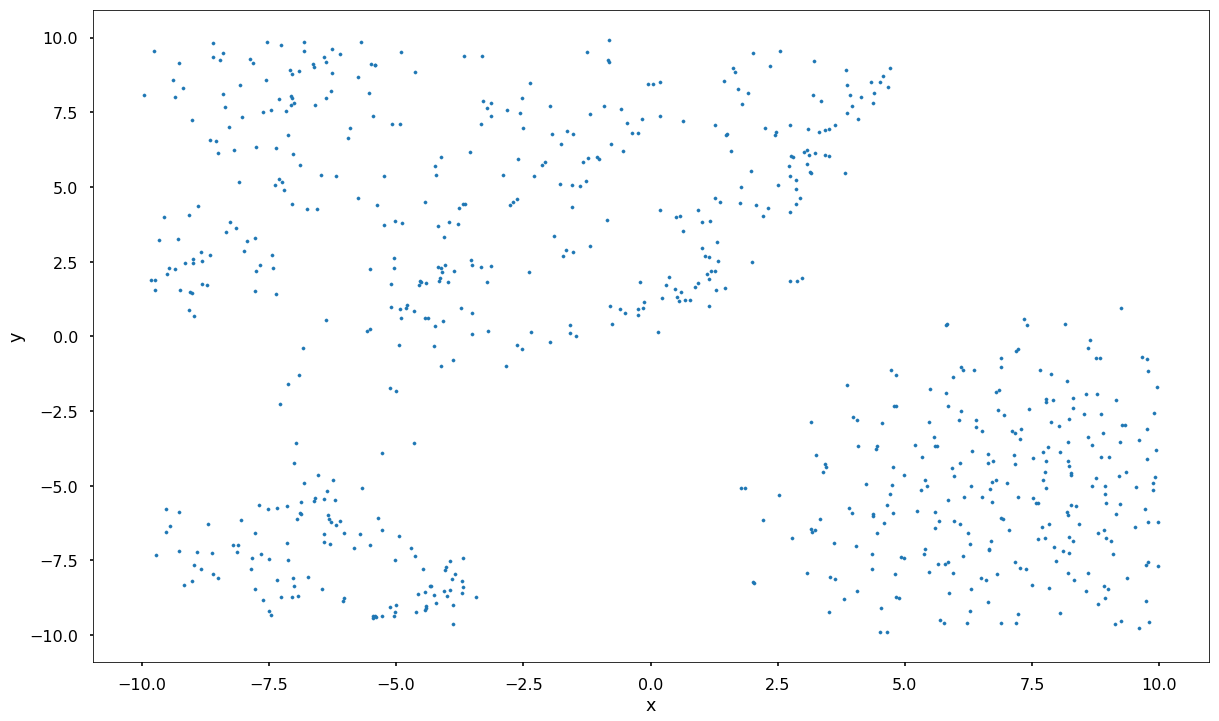

In [137]:
points.plot.scatter("x", "y", s=10, figsize=(20, 12))

**Zoom in to some interesting places**

In [138]:
def plot_region(x_bounds, y_bounds):
    slice = points[
        (x_bounds[0] <= points.x) &
        (points.x <= x_bounds[1]) & 
        (y_bounds[0] <= points.y) &
        (points.y <= y_bounds[1])
    ]
    
    ax = slice.plot.scatter("x", "y", s=35, figsize=(10, 8))
    for i, point in slice.iterrows():
        ax.text(point.x + 0.005, point.y + 0.005, point.word, fontsize=11)

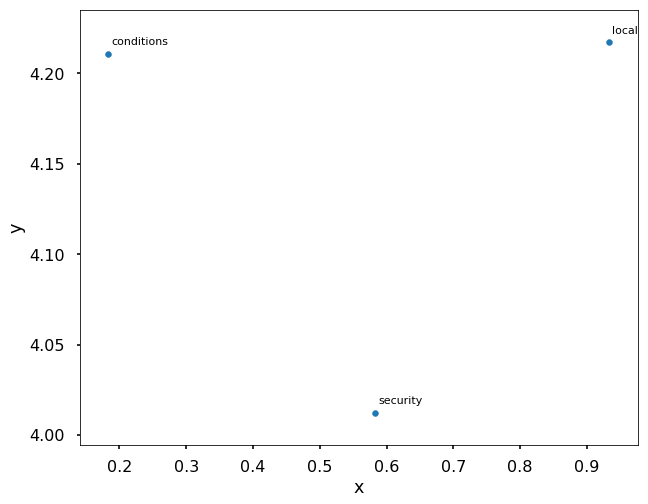

In [139]:
plot_region(x_bounds=(0, 1), y_bounds=(4, 4.5))

### Explore semantic similarities between book characters

**Words closest to the given word**

In [140]:
model.wv.most_similar("man")

2018-04-15 13:47:22,594 : INFO : precomputing L2-norms of word weight vectors


[('culture', 0.9969848394393921),
 ('conceptual', 0.9965848922729492),
 ('names', 0.9963202476501465),
 ('restraint', 0.996004045009613),
 ('personalist', 0.9954742193222046),
 ('forced', 0.995262086391449),
 ('considerable', 0.9950451850891113),
 ('consists', 0.9950418472290039),
 ('reality', 0.9946393966674805),
 ('managing', 0.9943283796310425)]

**Linear relationships between word pairs**

In [141]:
def nearest_similarity_cosmul(start1, end1, end2, correct=''):
    try:
        similarities = model.wv.most_similar_cosmul(
            positive=[end2, start1],
            negative=[end1]
        )
        s = [x[0] for x in similarities]
        start2 = s[0]
        
        if start2 == correct:
            print("{start1} is related to {end1}, as {start2} is related to {end2} ({correct})".format(**locals()))    
            return "correct"
        elif correct in s:
            print("{start1} is related to {end1}, as {start2} is related to {end2} ({correct})".format(**locals()))    
            return "almost"
        else:
            return "incorrect"
        
        return 'x'

        print("{start1} is related to {end1}, as {start2} is related to {end2} ({correct})".format(**locals()))
        try:
            print(s.index(correct))
        except:
            print('correct not in similarities')
        return start2
    except KeyError:
        return "OOV"

In [156]:
model.wv.most_similar_to_given('queen', ['boy', 'toaster', 'girl', 'woman'])

'toaster'

In [357]:
with open('/Users/zingbretsen/Documents/github/GloVe/eval/question-data/gram7-past-tense.txt', 'r') as f:
    lines = f.readlines()

results = {
    'correct': 0, 
    'incorrect': 0,
    'almost': 0,
    'OOV': 0
}

for line in lines:
    line = line.strip().split()

    result = nearest_similarity_cosmul(line[0], line[1], line[3], line[2])
    results[result] += 1

total = sum(list(results.values()))
print("Correct: {}/{}".format(results['correct'], total))
print("Almost: {}/{}".format(results['almost'], total))

dancing is related to danced, as flapping is related to flew (flying)
dancing is related to danced, as mummery is related to played (playing)
dancing is related to danced, as letter is related to read (reading)
dancing is related to danced, as relished is related to spent (spending)
dancing is related to danced, as take is related to took (taking)
describing is related to described, as sneer is related to played (playing)
describing is related to described, as madly is related to screamed (screaming)
describing is related to described, as chanted is related to sang (singing)
describing is related to described, as droop is related to slept (sleeping)
describing is related to described, as vanish is related to vanished (vanishing)
falling is related to fell, as moving is related to moved (moving)
falling is related to fell, as playing is related to played (playing)
falling is related to fell, as rivulets is related to ran (running)
falling is related to fell, as vanish is related to vani

thinking is related to thought, as listening is related to listened (listening)
thinking is related to thought, as play is related to played (playing)
thinking is related to thought, as reading is related to read (reading)
thinking is related to thought, as bed is related to slept (sleeping)
vanishing is related to vanished, as skies is related to walked (walking)
vanishing is related to vanished, as sleeping is related to slept (sleeping)
vanishing is related to vanished, as situation is related to struck (striking)
walking is related to walked, as folly is related to fell (falling)
walking is related to walked, as ups is related to moved (moving)
walking is related to walked, as playing is related to played (playing)
walking is related to walked, as folly is related to screamed (screaming)
writing is related to wrote, as game is related to played (playing)
writing is related to wrote, as i is related to said (saying)
writing is related to wrote, as madly is related to screamed (screa